### <center>МИНОБРНАУКИ РОССИИ

## <center>Федеральное государственное автономное образовательное учреждение высшего образования «Национальный исследовательский университет</center>

## <center>«Московский институт электронной техники»</center>
<br/><br/>
<br/><br/>
### **<center>Курсовая работа по дисциплине</center>**

### **<center>«МАТЕМАТИЧЕСКОЕ МОДЕЛИРОВАНИЕ»</center>**

### **<center>на тему «Распространение эпидемии инфекционного заболевания в рамках одной популяции без и с учетом выздоровления».</center>**
<br/><br/>
<br/><br/>
#### <div style="text-align: right"> Выполнила студентка  ПМ-41 Лобанова Анна Евгеньевна</div>
#### <div style="text-align: right"> Научный руководитель: Лебедев С.А</div>
<br/><br/>
<br/><br/>
# Оглавление¶
1. Модель без учета выздоровления больных особей
  * Содержательная постановка задачи
  * Концептуальная постановка задачи
  * Математическая постановка задачи
  * Решение
2. Модель с учетом выздоровления больных особей
  * Содержательная постановка задачи
  * Концептуальная постановка задачи
  * Математическая постановка задачи
  * Решение
<br/><br/>
<br/><br/>

# Модель без учета выздоровления больных особей

## Содержательная постановка задачи

Разработать математическую модель, позволяющую описать распространение эпидемии инфекционного заболевания в рамках одной популяции без учета выздоровления:

1.    Выяснить условия достижения равенства числа здоровых и больных особей без учета выздоровления.
2.    Провести анализ зависимости равенства числа здоровых и больных особей от коэффициента пропорциональности количеству встреч между здоровыми и больными особями без учета выздоровления.

## Концептуальная постановка задачи

Пренебрегая неоднородностью распределения популяции по пространству, введем функции:
* $x(t)$ - характеризующие число незараженных особей в момент времени t
* $y(t)$ - характеризующие число зараженных особей в момент времени t

Начальные условия:
* $x(0)=n$
* $y(0)=a$

Для того чтобы построить математическую модель, воспользуемся гипо-
тезой: инфекция передается при встрече зараженных особей с незараженны-
ми. Это означает, что число незараженных особей будет убывать с течением
времени пропорционально количеству встреч между зараженными и незара-
женными особями, т.е. пропорционально произведению $xy$.

## Математическая постановка задачи

На основании принятого предположения выразим убыль  $\Delta x$ незаражен-
ных особей за промежуток времени $\Delta t$ в виде:

$$\Delta x=x(t + \Delta t) - x(t) = -\beta x y \Delta t \ \ \ \ (1)$$
$\beta$ - коэффицент пропорциональности.

В (1) при $\Delta t \to 0$:

$$lim_{\Delta t \to 0} \frac{\Delta x}{\Delta t} = \frac{dx}{dt} = -\beta x y \Delta t \ \ \ \ (2)$$

Для замыкания модели будем считать, что болезнь не приводит к смертности,
следовательно, можно написать условие баланса

$$a+n = x+y = const \ \ \ \ (3)$$

Учитывая (3), перепишем (2) и добавим начальное условие:

$$\frac{dx}{dt} = -\beta x (n + a - x) \ \ \ \ (4)$$

$$x(0) = n \ \ \ \ (5)$$

Формулы (4), (5) представляют собой математическую модель динами-
ки численности незараженных особей. Коэффициент пропорциональности $\beta$
в модели характеризует вероятность передачи инфекции при встречах больных и здоровых особей. В общем случае значение параметра $\beta$ зависит от
вида особи и типа болезни.

При известном $x(t)$ число $y(t)$ зараженных особей определится из условия баланса (3)
$$y = a+n-x \ \ \ \ (6)$$

Считая $\beta$ постоянной величиной, найдем численное решение обыкновенного дифференциального уравнения (4) с помощью python.

## Решение

MovieWriter imagemagick unavailable; using Pillow instead.


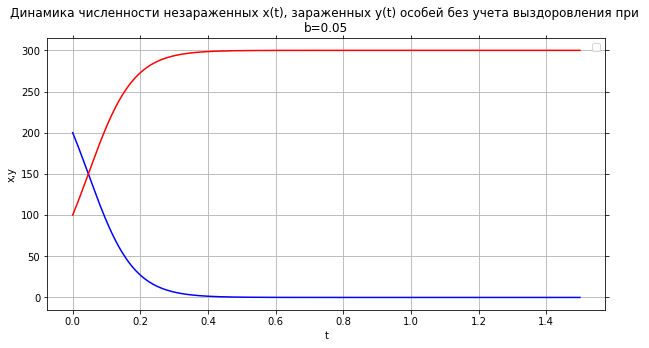

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#  Импортируем модуль для работы с анимацией:
import matplotlib.animation as animation

n = 200
a = 100
t = np.linspace(0, 1.5, 300)
def f(t, x, b, c): return -b * x * (n + a - x)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.legend(['x', 'y'], shadow=True)

def animate(b):
    ax.clear()
    ax.set(title=f"Динамика численности незараженных x(t), зараженных y(t) особей без учета выздоровления при \nb={round(b, 3)}",
      xlabel='t',
      ylabel='x,y')
    ax.legend("s")
    ax.grid()
    sol = solve_ivp(f, [0, 3], [n], args=(b, 0), dense_output=True)
    z = sol.sol(t)
    line1 = ax.plot(t, z.T, 'b')
    line2 = ax.plot(t, a + n - z.T, 'r')
    return line1, line2

f_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.linspace(0, 0.05, 100),
                                      interval = 500,
                                      repeat = False)

f_animation.save('gif/not_recovery.gif',
                 writer='imagemagick', 
                 fps=30)

### СМ. график в gif/not_recovery.gif

$x(t)$ - синий график, $y(t)$ - красный график.

Начальные значения числа незараженных и
зараженных особей приняты равными n = 200, a = 100. При уве-
личении $\beta$ скорость передачи инфекции увеличивается, и численность незараженных особей падает быстрее.

# Модель с учетом выздоровления больных особей

## Содержательная постановка задачи

Разработать математическую модель, позволяющую описать распространение эпидемии инфекционного заболевания в рамках одной популяции с учетом выздоровления:

1.    Выяснить условия достижения равенства числа здоровых и больных особей с учетом выздоровления.
2.    Провести анализ зависимости равенства числа здоровых и больных особей от коэффициента пропорциональности количеству встреч между здоровыми и больными особями с учетом выздоровления.

## Концептуальная постановка задачи

Изменим приведенную модель, добавляя в нее еще один процесс – выздоровление больных особей. Для этого введем новую функцию $z(t)$ , выражающую число выздоровевших особей.

## Математическая постановка задачи

Новая математическая модель может быть представлена системой уравнений:
$$ \begin{cases}
& \frac{dx}{dt} = -\beta x y \\
& \frac{dy}{dt} = \beta x y - \gamma y \ \ \ \ \ \ \ (7)\\
& \frac{dz}{dt} = \gamma y 
\end{cases}
$$

где параметр $\gamma$ характеризует степень выздоровления и определяется видом болезни и типом особи. Число выздоровевших особей в начальный момент времени равно нулю, поэтому начальные условия для системы (7) примут вид:

$$x(0) = n,\ y(0) = a,\ z(0) = 0. \ \ \ \ \ \ (8)$$

Условие баланса (3) перпепишется как

$$x + y + z = n + a \ \ \ \ \ \ (9)$$

Найдем численное решение задачи (7)-(9) с помощью python.

## Решение


MovieWriter imagemagick unavailable; using Pillow instead.


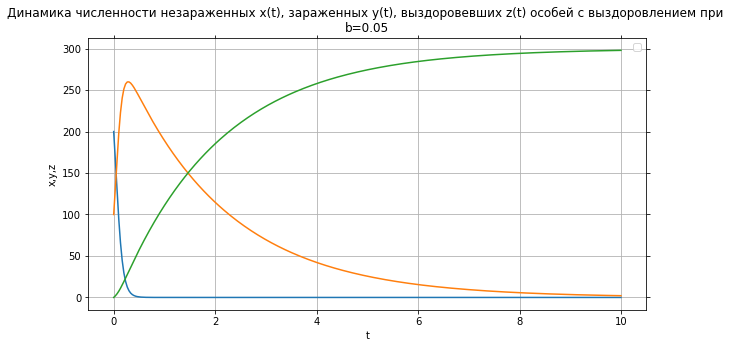

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#  Импортируем модуль для работы с анимацией:
import matplotlib.animation as animation

n = 200
a = 100
g = 0.5
t = np.linspace(0, 10, 300)
def f(t, y, b, g):
    x, u, z = y
    return [-b * x * u, b * x * u - g * u, g * u]

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.legend(['x', 'y'], shadow=True)

def animate(b):
    ax.clear()
    ax.set(title=f"Динамика численности незараженных x(t), зараженных y(t), выздоровевших z(t) особей с выздоровлением при \nb={round(b, 3)}",
      xlabel='t',
      ylabel='x,y,z')
    ax.legend("s")
    ax.grid()
    sol = solve_ivp(f, [0, 10], [n, a, 0], args=(b, g), dense_output=True)
    z = sol.sol(t)
    line = ax.plot(t, z.T)
    return line

f_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.linspace(0, 0.05, 100),
                                      interval = 500,
                                      repeat = False)

f_animation.save('gif/recovery.gif',
                 writer='imagemagick', 
                 fps=30)

$x(t)$ - синий график, $y(t)$ - оранжевый график, $z(t)$ - зеленый график.

### СМ. график в gif/recovery.gif

По графикам видно, что с ростом $t$ все особи успевают заболеть, т.е. величина $x$ падает до нуля. Численность зараженных особей y сначала
растет, но дальше уменьшается в связи с их выздоровлением. При $t \to \infty$
модель предсказывает полное выздоровление всех особей.